In [1]:
# Import necessary libraries
import random
import pandas as pd
import numpy as np
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import torch

# Check if CUDA (GPU) is available for PyTorch, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [3]:
# Define directory paths for datasets
DATASET_PATH = "data/"

TRAIN_DIR = DATASET_PATH + 'train'
VAL_DIR = DATASET_PATH + 'val'
TEST_DIR = DATASET_PATH + 'test'

# Define paths for CSV metadata files (train, validation, and test data)
TRAIN_CSV = DATASET_PATH + 'train.csv'
VAL_CSV = DATASET_PATH + 'val.csv'
TEST_CSV = DATASET_PATH + 'test.csv'

In [4]:
# Load the CSV files into pandas DataFrames
train_df = pd.read_csv(TRAIN_CSV)
val_df = pd.read_csv(VAL_CSV)
test_df = pd.read_csv(TEST_CSV)


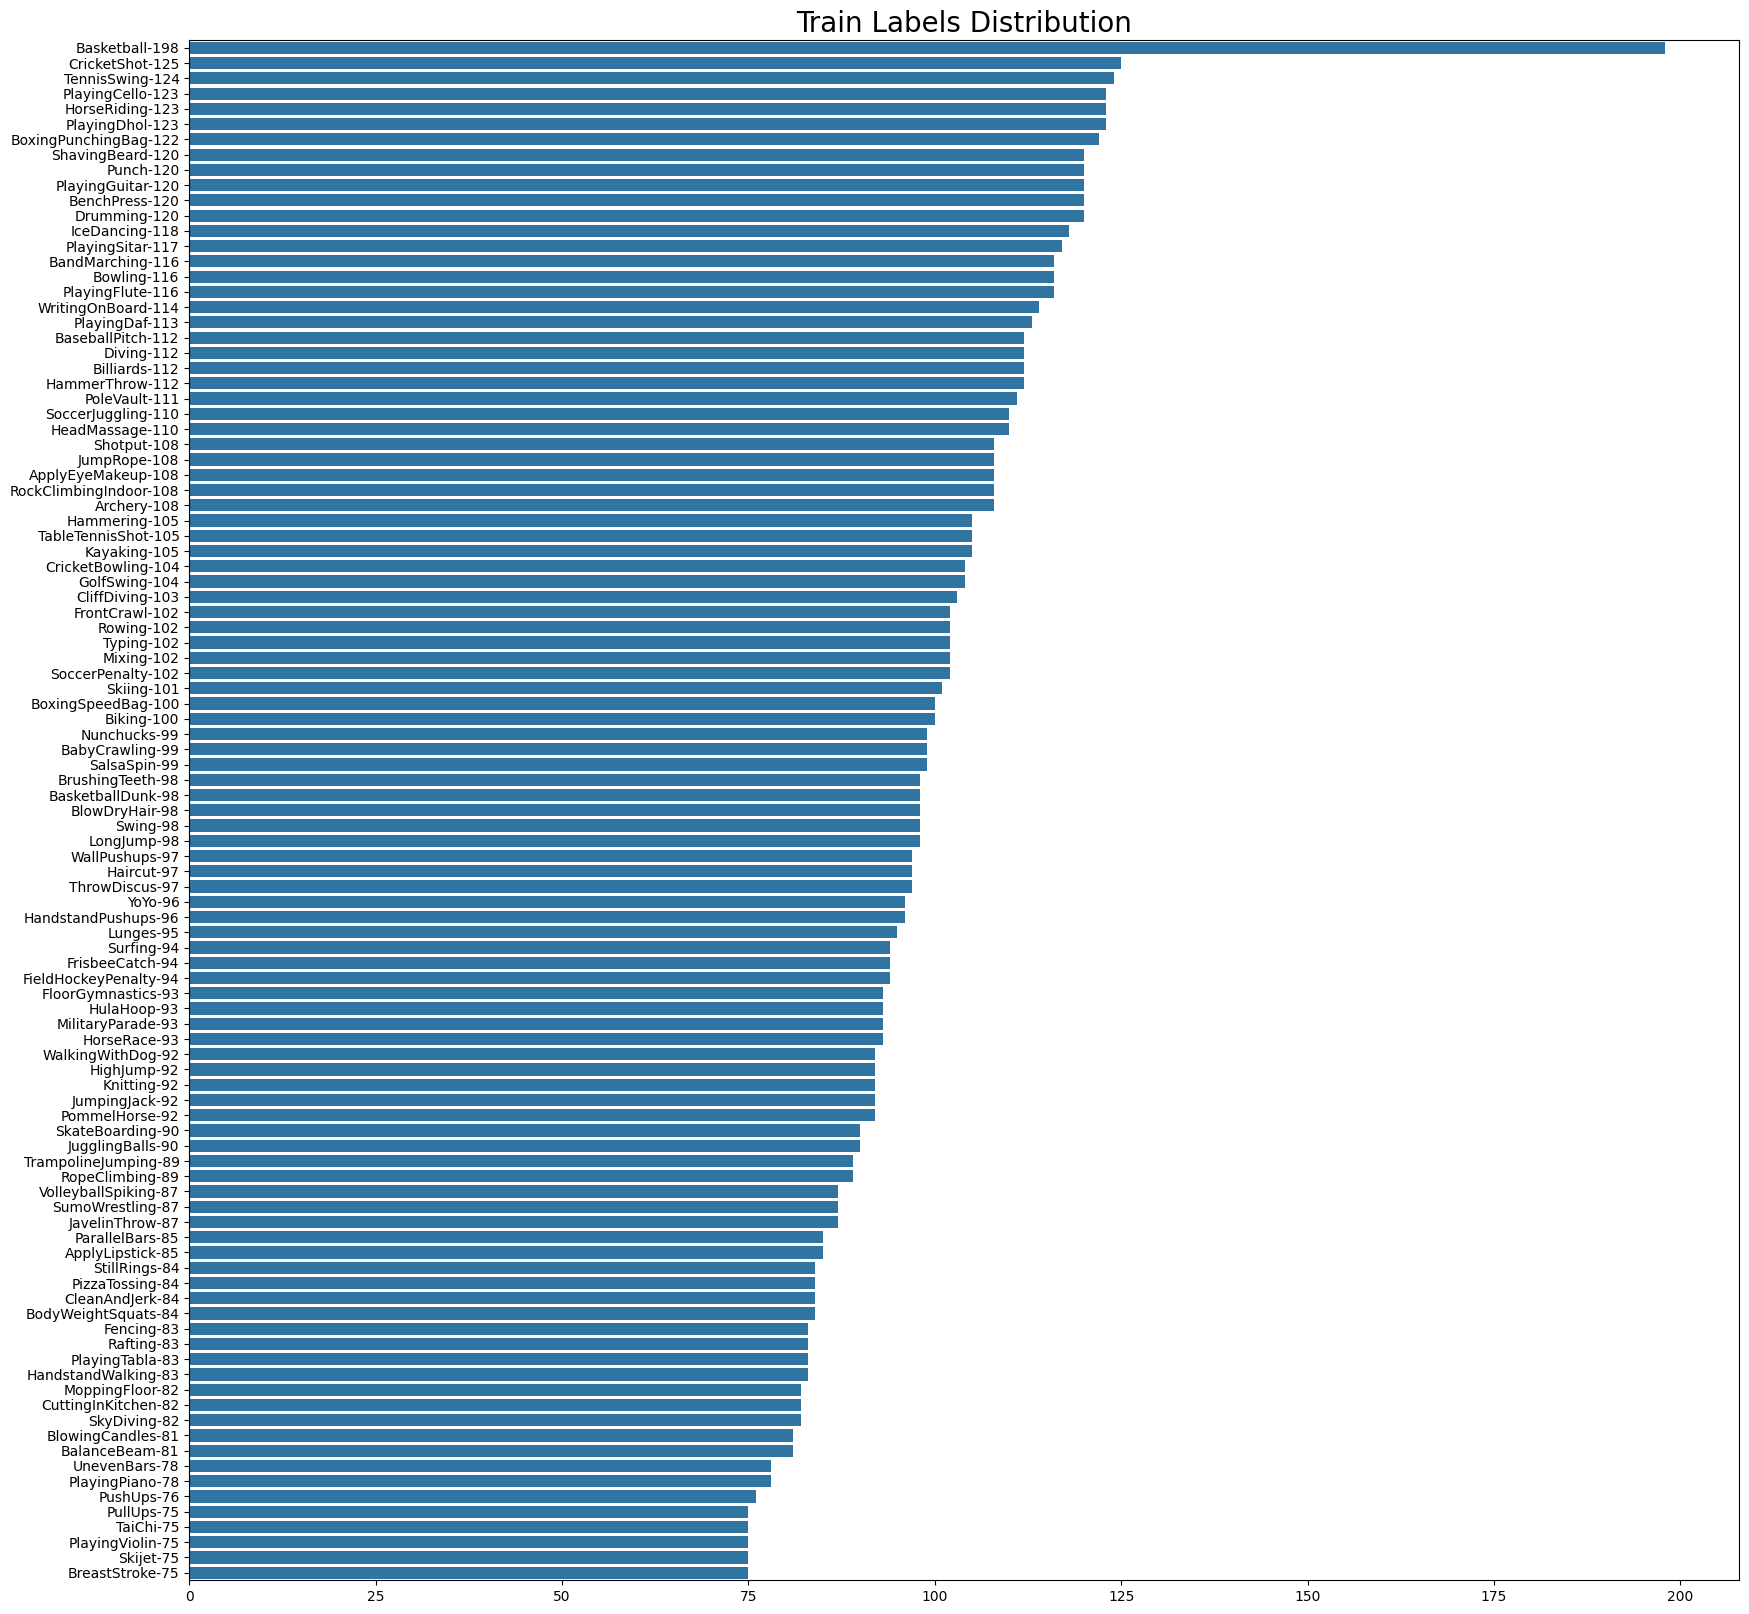

In [5]:
# Plot the label distribution for the training dataset
plt.figure(figsize=(20, 20))
plt.title('Train Labels Distribution', fontsize=20)
label_distribution = train_df['label'].value_counts()

# Create a horizontal bar plot of the label distribution
sns.barplot(x=label_distribution.values,
            y=list(label_distribution.keys() + "-" + label_distribution.values.astype(str)),
            orient="h");

In [6]:
# Define a list of labels to focus on (for specific actions)
PENTA_LABELS = ['BenchPress', 'BoxingPunchingBag', 'HorseRiding', 'PlayingCello', 'PlayingGuitar']


In [7]:
# Filter the DataFrames to include only rows corresponding to the selected labels
train_penta_df = train_df[train_df['label'].isin(PENTA_LABELS)]
val_penta_df = val_df[val_df['label'].isin(PENTA_LABELS)]
test_penta_df = test_df[test_df['label'].isin(PENTA_LABELS)]


In [8]:
# Shuffle the dataframes and reset the indices to ensure randomness
train_penta_df = train_penta_df.sample(frac=1.0).reset_index(drop=True)
val_penta_df = val_penta_df.sample(frac=1.0).reset_index(drop=True)
test_penta_df = test_penta_df.sample(frac=1.0).reset_index(drop=True)


In [9]:
# Add full paths to video clips in the 'clip_path' column
train_penta_df['clip_path'] = train_penta_df['clip_path'].apply(lambda path: DATASET_PATH[:-1] + path)
val_penta_df['clip_path'] = val_penta_df['clip_path'].apply(lambda path: DATASET_PATH[:-1] + path)
test_penta_df['clip_path'] = test_penta_df['clip_path'].apply(lambda path: DATASET_PATH[:-1] + path)


In [10]:
# Display the first 10 rows of the training DataFrame after modification
train_penta_df.head(10)


,clip_name,clip_path,label
0,v_PlayingGuitar_g19_c03,data/train/PlayingGuitar/v_PlayingGuitar_g19_c...,PlayingGuitar
1,v_HorseRiding_g04_c07,data/train/HorseRiding/v_HorseRiding_g04_c07.avi,HorseRiding
2,v_PlayingGuitar_g04_c01,data/train/PlayingGuitar/v_PlayingGuitar_g04_c...,PlayingGuitar
3,v_BoxingPunchingBag_g25_c05,data/train/BoxingPunchingBag/v_BoxingPunchingB...,BoxingPunchingBag
4,v_BoxingPunchingBag_g08_c02,data/train/BoxingPunchingBag/v_BoxingPunchingB...,BoxingPunchingBag
5,v_PlayingCello_g22_c04,data/train/PlayingCello/v_PlayingCello_g22_c04...,PlayingCello
6,v_PlayingGuitar_g02_c02,data/train/PlayingGuitar/v_PlayingGuitar_g02_c...,PlayingGuitar
7,v_HorseRiding_g20_c07,data/train/HorseRiding/v_HorseRiding_g20_c07.avi,HorseRiding
8,v_HorseRiding_g06_c07,data/train/HorseRiding/v_HorseRiding_g06_c07.avi,HorseRiding
9,v_HorseRiding_g09_c06,data/train/HorseRiding/v_HorseRiding_g09_c06.avi,HorseRiding


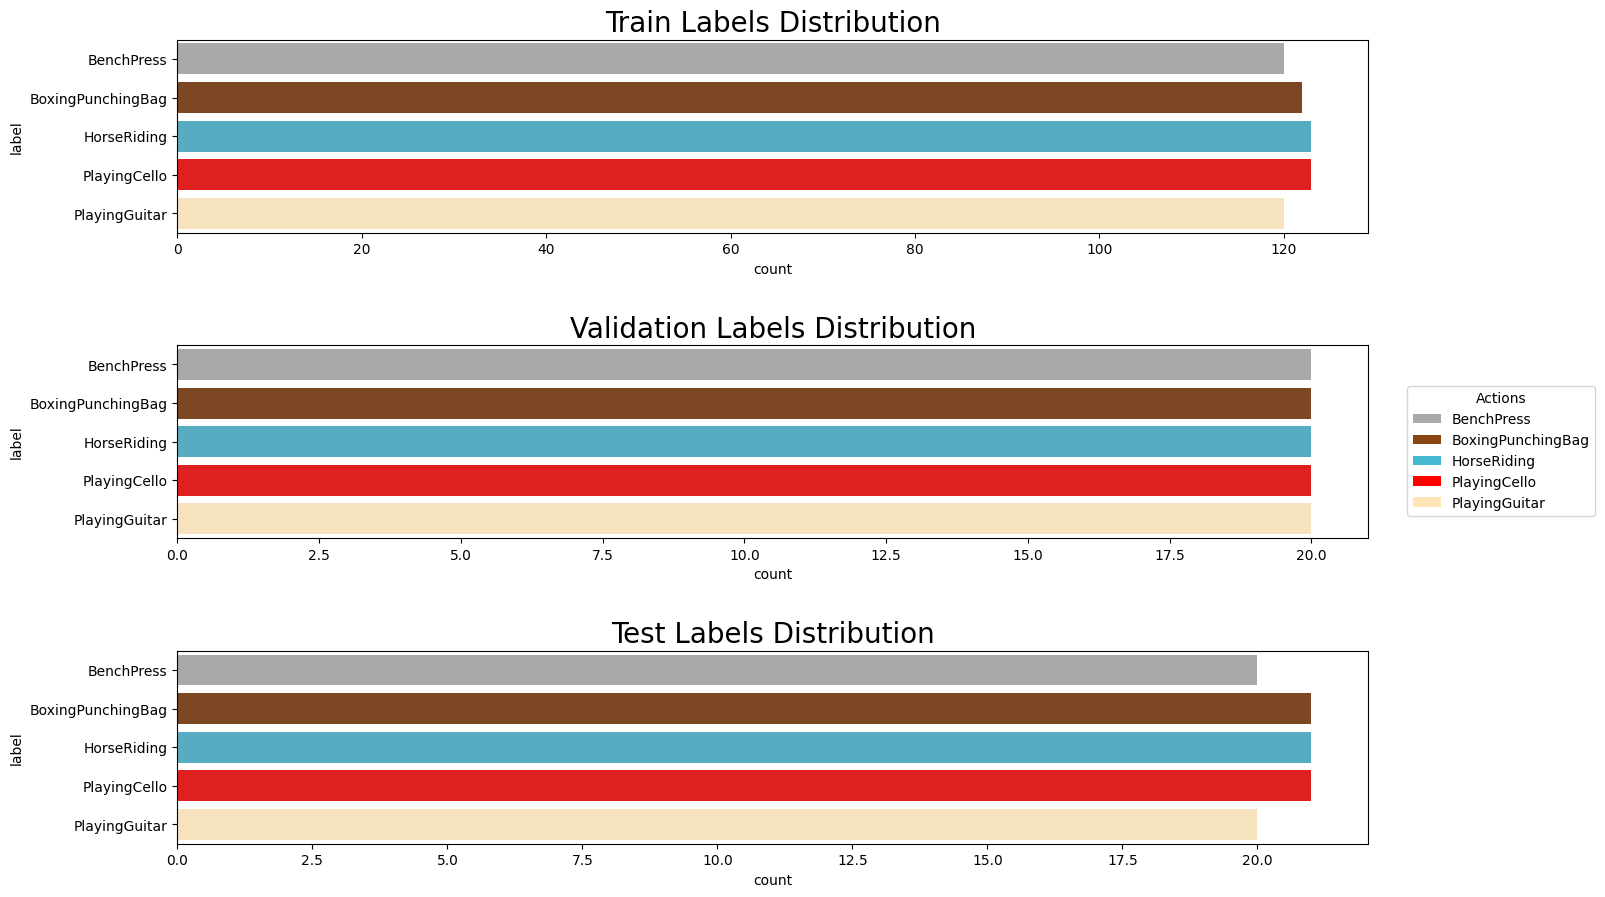

In [11]:
# Define a color palette for each action label to use in plots
color_palette = {
    'BenchPress': '#A9A9A9',  # Grey for weights/metal
    'BoxingPunchingBag': '#8B4513',  # Brown for drums
    'HorseRiding': '#45B7D1',  # Sky Blue
    'PlayingCello': '#FF0000',  # Red for punch
    'PlayingGuitar': '#FFE4B5'  # Light beige for shaving
}

# Create subplots to visualize the label distribution across training, validation, and test datasets
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 10))

# Set the spacing between subplots
fig.tight_layout(pad=6.0)

# Helper function to prepare data for plotting
def prepare_plot_data(distribution):
    return pd.DataFrame({
        'count': distribution.values,
        'label': distribution.index,
    }).sort_values('label')

# Plot distribution of training labels
ax1.set_title('Train Labels Distribution', fontsize=20)
train_plot_df = prepare_plot_data(train_penta_df['label'].value_counts())
sns.barplot(data=train_plot_df,
            x='count',
            y='label',
            hue='label',
            palette=color_palette,
            legend=False,
            orient="h", 
            ax=ax1)

# Plot distribution of validation labels
ax2.set_title('Validation Labels Distribution', fontsize=20)
val_plot_df = prepare_plot_data(val_penta_df['label'].value_counts())
sns.barplot(data=val_plot_df,
            x='count',
            y='label',
            hue='label',
            palette=color_palette,
            legend=False,
            orient="h", 
            ax=ax2)

# Plot distribution of test labels
ax3.set_title('Test Labels Distribution', fontsize=20)
test_plot_df = prepare_plot_data(test_penta_df['label'].value_counts())
sns.barplot(data=test_plot_df,
            x='count',
            y='label',
            hue='label',
            palette=color_palette,
            legend=False,
            orient="h", 
            ax=ax3)

# Add a legend to the plot
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, label=label) 
                  for label, color in color_palette.items()]
fig.legend(handles=legend_elements, 
          loc='center right', 
          bbox_to_anchor=(1.1, 0.5),
          title='Actions')

# Show the plot
plt.show()

In [12]:
# Define a function to load video frames from a video file
def load_video_frames(video_path, frame_step=1, frame_count=10):
    """
    Load frames from a video with a specified frame step and number of frames.
    If the video doesn't have enough frames, generate black frames to fill the remainder.
    
    Args:
        video_path (str): Path to the video file.
        frame_step (int): Step to skip frames. Defaults to 1 (no skipping).
        frame_count (int): Number of frames to load. Defaults to 10.
    
    Returns:
        list: List of video frames (in RGB format).
    """
    cap = cv2.VideoCapture(video_path)  # Open the video file
    frames = []
    frame_idx = 0

    while cap.isOpened() and len(frames) < frame_count:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % frame_step == 0:
            # Convert from BGR (OpenCV format) to RGB (Matplotlib format)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
        frame_idx += 1

    cap.release()  # Close the video capture object

    # Get the shape of the first frame (width, height, channels)
    img_shape = frames[0].shape

    # Generate black frames if the video has fewer frames than required
    while len(frames) < frame_count:
        black_frame = np.zeros(img_shape, dtype=np.uint8)  # Create black frames
        frames.append(black_frame)

    return frames

In [13]:
# Define a function to display frames from the video in a grid layout
def view_frames(frames, frame_step=1):
    """
    Display frames in a grid layout with frame number and frame step in the title.
    
    Args:
        frames (list): List of frames to display.
        frame_step (int): Frame step used for loading the frames.
    """
    n = len(frames)  # Total number of frames
    rows = n // 5  # Calculate number of rows for the grid
    if n % 5 > 0:
        rows += 1

    plt.figure(figsize=(18, 8))  # Set the figure size for the grid
    for idx, frame in enumerate(frames):
        plt.subplot(rows, 5, idx + 1)  # Create a subplot for each frame
        plt.title(f"Frame #{idx * frame_step + 1}")  # Title with frame number
        plt.axis("off")  # Hide axes
        plt.imshow(frame)  # Display the frame
    plt.show()

In [14]:
# Select a random sample from the training set and print the video path
sample_path = random.sample(train_penta_df['clip_path'].to_list(), 1)[0]
print(f"Sample path: {sample_path}")

# Load frames from the selected video sample
frame_step = 15
sample_video = load_video_frames(sample_path, frame_step=frame_step, frame_count=10)


Sample path: data/train/HorseRiding/v_HorseRiding_g24_c05.avi


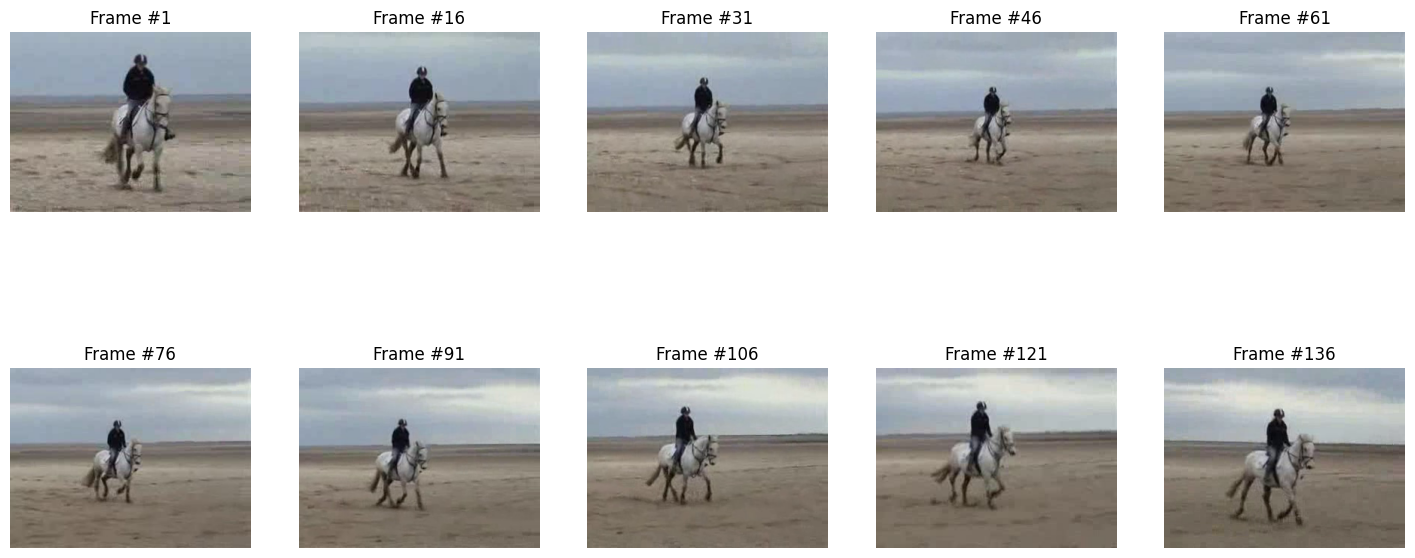

In [15]:
# Display the video frames
view_frames(sample_video, frame_step=frame_step)


In [16]:
# Import necessary classes for Dataset and DataLoader from PyTorch
from torch.utils.data import Dataset, DataLoader


In [17]:
# Define a custom dataset class to handle video sequences
class VideoDataset(Dataset):
    def __init__(self, dataframe, input_frames=10, output_frames=5, stride=3, frame_size=(64, 64), transform=None, color_mode='grayscale'):
        """
        Initialize the dataset with the specified parameters.
        
        Args:
            dataframe (pd.DataFrame): DataFrame containing video file paths.
            input_frames (int): Number of input frames for the model.
            output_frames (int): Number of frames to predict.
            stride (int): Step size to skip between sequences.
            frame_size (tuple): Tuple specifying frame width and height.
            transform (callable, optional): Transform to apply on each frame.
            color_mode (str): 'grayscale' or 'rgb'.
        """
        self.input_frames = input_frames
        self.output_frames = output_frames
        self.sequence_length = self.input_frames + self.output_frames
        self.stride = stride
        self.transform = transform
        self.color_mode = color_mode
        self.frame_size = frame_size
        self.sequences = []  # List to store the sequences of frames
        self.cached_video = None  # Cache the video frames
        self.cached_video_path = None  # Path of the cached video

        # Iterate through the DataFrame to build the sequences list
        for idx, row in dataframe.iterrows():
            video_path = row['clip_path']
            total_frames = self.get_total_frames(video_path)

            # Check if the video has enough frames for the sequence
            if total_frames < self.sequence_length:
                total_sequences = 1  # Only one sequence if the video is too short
            else:
                total_sequences = (total_frames - self.sequence_length) // self.stride + 1

            # Create sequences with the specified stride
            for seq_idx in range(total_sequences):
                start_idx = seq_idx * self.stride
                self.sequences.append({
                    'video_path': video_path,
                    'start_idx': start_idx,
                    'total_frames': total_frames
                })

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        """Fetch a sequence of frames for training or testing."""
        sequence_info = self.sequences[idx]
        video_path = sequence_info['video_path']
        start_idx = sequence_info['start_idx']
        total_frames = sequence_info['total_frames']

        # Check if the video is cached, if not, load the video
        if self.cached_video_path != video_path:
            self.cached_video = self.load_video(video_path)
            self.cached_video_path = video_path

        # Extract the frames from the cached video
        end_idx = start_idx + self.sequence_length
        frames = self.cached_video[start_idx:end_idx]

        # If the frames are fewer than required, augment them with the last frame
        if len(frames) < self.sequence_length:
            frames = self.augment_frames(frames, self.sequence_length)

        # Split into input and target sequences
        input_seq = frames[:self.input_frames]
        target_seq = frames[self.input_frames:]

        # Convert to grayscale if necessary
        if self.color_mode == 'grayscale':
            input_seq = input_seq[..., np.newaxis]
            target_seq = target_seq[..., np.newaxis]

        # Change frame dimensions to match PyTorch input format (C, H, W)
        input_seq = input_seq.transpose(0, 3, 1, 2)
        target_seq = target_seq.transpose(0, 3, 1, 2)

        # Convert to torch tensors and normalize the pixel values
        input_seq = torch.from_numpy(input_seq).float() / 255.0
        target_seq = torch.from_numpy(target_seq).float() / 255.0

        # Apply any additional transformations (e.g., data augmentation)
        if self.transform:
            input_seq = self.apply_transform(input_seq)
            target_seq = self.apply_transform(target_seq)

        return {'input': input_seq, 'target': target_seq}

    def load_video(self, video_path):
        """Load all frames from a video into memory."""
        cap = cv2.VideoCapture(video_path)
        frames = []
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.resize(frame, self.frame_size)
            if self.color_mode == 'grayscale':
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            else:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
        cap.release()
        return np.array(frames)

    def augment_frames(self, frames, required_length):
        """Augment frames to meet the required length by repeating the last frame."""
        current_length = len(frames)
        deficit = required_length - current_length

        # Repeat the last frame to fill the gap
        last_frame = frames[-1] if len(frames) > 0 else np.zeros((self.frame_size[1], self.frame_size[0], 3), dtype=np.uint8)
        augmented_frames = np.concatenate([frames, np.repeat(last_frame[np.newaxis, ...], deficit, axis=0)], axis=0)

        return augmented_frames

    def get_total_frames(self, video_path):
        """Get the total number of frames in a video."""
        cap = cv2.VideoCapture(video_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        cap.release()
        return total_frames

    def apply_transform(self, sequence):
        """Apply the transform to each frame in the sequence."""
        transformed_sequence = []
        for frame in sequence:
            frame = self.transform(frame)
            transformed_sequence.append(frame)
        if len(transformed_sequence) == 0:
            raise ValueError("Transformed sequence is empty.")
        transformed_sequence = torch.stack(transformed_sequence)
        return transformed_sequence

In [18]:
# Parameters for dataset and dataloaders
batch_size = 32                 # Number of sequences per batch
color_mode = 'rgb'              # or 'grayscale'
input_frames = 10               # Number of input frames for prediction
output_frames = 5               # Number of frames to predict
stride = 4                      # Number of frames to skip between sequences (stride - 1)
frame_size = (64, 64)           # Resize each frame to 64x64
num_workers = 0                 # Number of workers for data loading

In [19]:
# Define the normalization transform for input frames
import torchvision.transforms as transforms

if color_mode == 'grayscale':
    transform = transforms.Compose([transforms.Normalize(mean=[0.5], std=[0.5])])
else:
    transform = transforms.Compose([transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])


In [20]:
# Create the dataset instances for training, validation, and test
train_dataset = VideoDataset(train_penta_df, input_frames, output_frames, stride, frame_size, transform, color_mode)
val_dataset = VideoDataset(val_penta_df, input_frames, output_frames, stride, frame_size, transform, color_mode)
test_dataset = VideoDataset(test_penta_df, input_frames, output_frames, stride, frame_size, transform, color_mode)


In [21]:
# Create data loaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)


In [22]:
# Print the total number of batches in the train loader
print(f"Total train batches: {len(train_loader)}")

# Print the total number of sequences in the training dataset
print(f"Total train sequences: {len(train_dataset)}")

# Print the total number of frames in the training dataset
print(f"Total train frames: {len(train_dataset) * train_dataset.sequence_length}")


Total train batches: 873
Total train sequences: 27910
Total train frames: 418650


In [23]:
# Fetch and display a batch of training data
for batch in train_loader:
    input_seq = batch['input']  # Shape: [batch_size, input_frames, channels, height, width]
    target_seq = batch['target']  # Shape: [batch_size, output_frames, channels, height, width]

    print(f"Input sequence shape: {input_seq.shape}")
    print(f"Target sequence shape: {target_seq.shape}")

    # Break after processing the first batch
    break

Input sequence shape: torch.Size([32, 10, 3, 64, 64])
Target sequence shape: torch.Size([32, 5, 3, 64, 64])
